Constructing and training a CNN is often a complex and long process. However, once a model has been trained and evaluated, it can be shared and reused.

Keras provides several pre-trained models that are available for use right out of the box. These models are all trained using the ImageNet dataset: http://www.image-net.org

This example uses the VGG19 model.

Keras provides utility functions to assist with image loading and data pre-processing. In fact, each model provides its own pre-processing function to resize, scale, and pre-process an input image into the same format that the model was originally trained on. Without this pre-processing function, users would have to do all of that work themselves before using the model.

The image size can be found directly from the Keras documentation for the model: https://keras.io/applications/#vgg19

In [9]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [10]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

In [11]:
# Define default image size for VGG19
image_size = (224, 224)

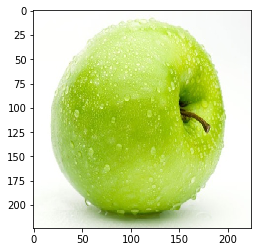

In [18]:
# Load the image and resize to default image size
image_path = os.path.join("..", "Images", "green_apple1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [19]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [[('n07742313', 'Granny_Smith', 0.9955647), ('n07753113', 'fig', 0.0010895317), ('n07749582', 'lemon', 0.0010283537)]]


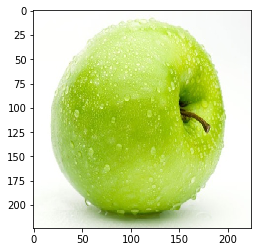

In [20]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [21]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n07742313', 'Granny_Smith', 0.99662554), ('n07749582', 'lemon', 0.0005570347), ('n07720875', 'bell_pepper', 0.0004704698)]]


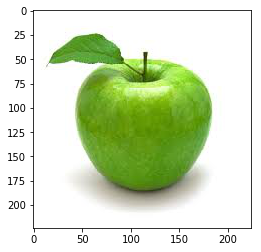

In [22]:
image_path = os.path.join("..", "Images", "green_apple2.jpg")
predict(image_path)